<a href="https://colab.research.google.com/github/Xiaojun-Wei/ML-keras-to-kubernetes-study-notes/blob/main/Ch3_%E5%A4%84%E7%90%86%E9%9D%9E%E7%BB%93%E6%9E%84%E5%8C%96%E6%95%B0%E6%8D%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 理解图像

**将图像加载为array，然后调整的大小并显示**

In [14]:
import cv2
print("opencv version: ", cv2.__version__)
import numpy as np
import matplotlib.pyplot as plt
# show charts inline in notebook
%matplotlib inline

opencv version:  4.1.2


In [16]:
# load JPG image as array
image = cv2.imread('monalisa.jpg')
# convert the image from BGR to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show the size of the array
print("Original image array shape: ", image.shape)
# 显示指定位置的像素值
print("pixel (100, 100) values: ", image[100][100][:])
# 调整图像大小
# image = cv2.resize(image, (400, 600))
# plt.imshow(image)
# plt.show()
# 显示调整后的图像大小
# print("Resized image array shape: ", image.shape())
# 从 RGB转化至BGR颜色空间
# image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# 储存调整过的图像
# cv2.imwrite('new_monalisa.jpg', my_image)
# 图像灰度处理
# my_grey = cv2.cvtColor(myimage, cv2.COLOR_RGB2GRAY)
# print("image converted to grayscale")
# plt.imshow(my_gray, cmap='gray')
# plt.show()

Original image array shape:  (600, 400, 3)
pixel (100, 100) values:  [160 163 108]


**3-3 perform array operations on the image 对图像执行阵列操作**

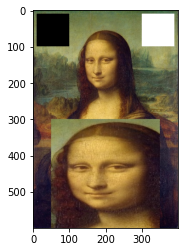

In [11]:
# 在左上角画一个黑色矩形
image[10:100, 10:100, :] = 0
plt.imshow(image)

# 在右上角画一个红色矩形
image[10:100, 300:390, :] = 255
# 将红色通道设置为最大值255
plt.imshow(image)

# 脸部区域的像素作为感兴趣区域 ROI
roi = image[50:250, 125:250, :]
# 调整ROI的大小
roi = cv2.resize(roi, (300, 300))
# 使用ROI区域覆盖原始图像
image[300:600, 50:350, :] = roi
plt.imshow(image)

**3-4 对图像执行计算机视觉操作**

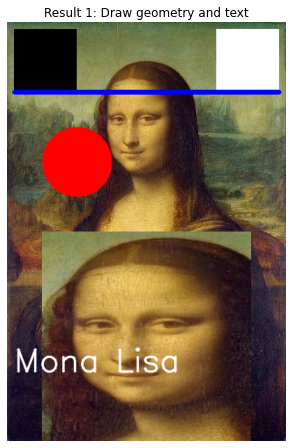

In [15]:
# 定义函数显示图像和标题
# 包括参数p_image和p_title
def show_image(p_image, p_title):
  plt.figure(figsize=(5,10))
  plt.axis('off')
  plt.title(p_title)
  plt.imshow(p_image)

# 复制图像
temp_image = image.copy()

# 在RGB颜色空间中，指定两个坐标点，画一条蓝色的先（0，0，255），线宽为5px
cv2.line(temp_image, (10,100), (390, 100), (0,0,255),5)

# 画圆形，线宽为-1
cv2.circle(temp_image, (100,200), 50, (255,0,0), -1)

# 为图像设置文字
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(temp_image, "Mona Lisa", (10, 500), font, 1.5, (255, 255, 255), 2, cv2.LINE_AA)

# 调用函数显示图像
show_image(temp_image, 'Result 1: Draw geometry and text')

**3-5 对图像执行计算机视觉阈值化处理**

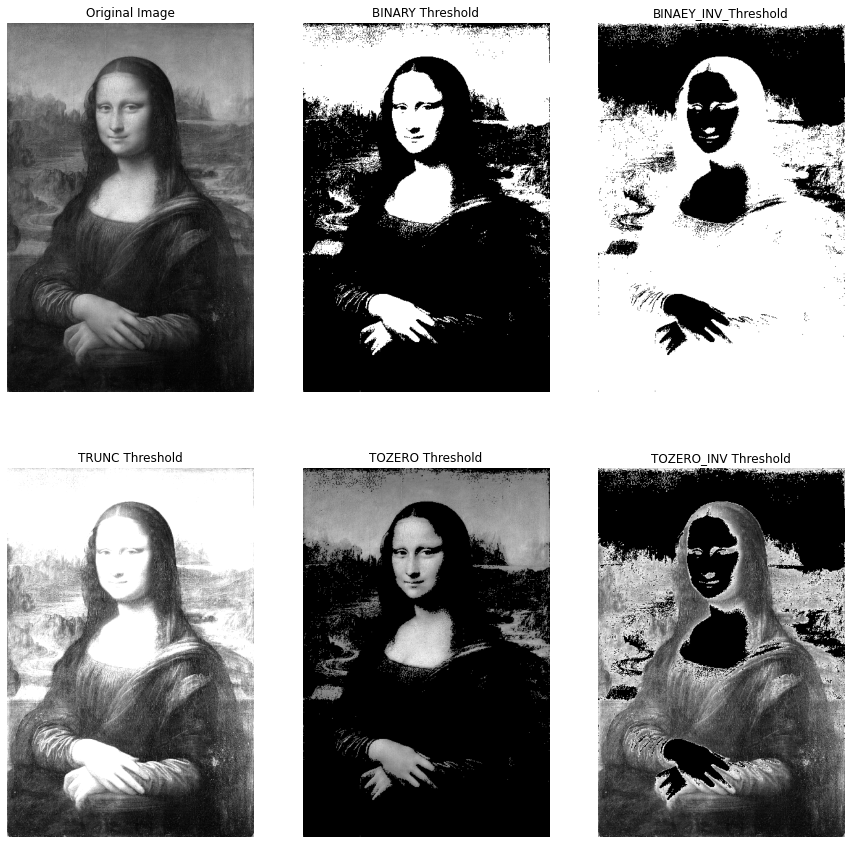

In [22]:
# 复制原始图像
temp_image = image.copy()
# 将图像转化为灰度图像
gray = cv2.cvtColor(temp_image, cv2.COLOR_RGB2GRAY)

# 使用不同的算法为图像设定阈值
ret, thresh1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 100, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO_INV)

# 为上述算法设置标题
titles = ['Original Image', 'BINARY Threshold', 'BINAEY_INV_Threshold', 'TRUNC Threshold',
          "TOZERO Threshold", "TOZERO_INV Threshold"]

# 创建结果图像阵列
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]

# 将这些图像展示为一个array
plt.figure(figsize=(15,15))
for i in np.arange(6):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.axis('off')
plt.show()

**3-6 Run Kernel/Filters on the Image to Blur and Sharpen 在图像上运行滤波器/卷积核来进行模糊和锐化操作**

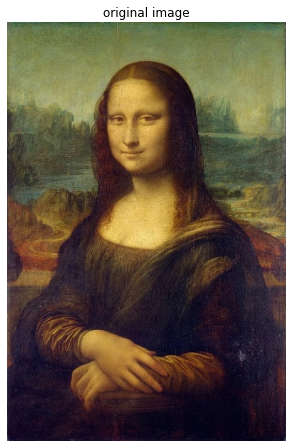

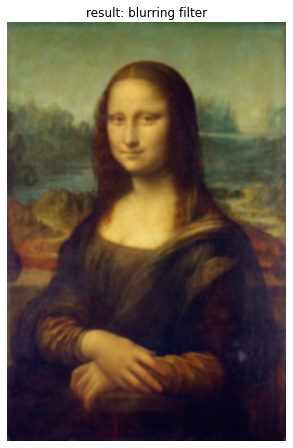

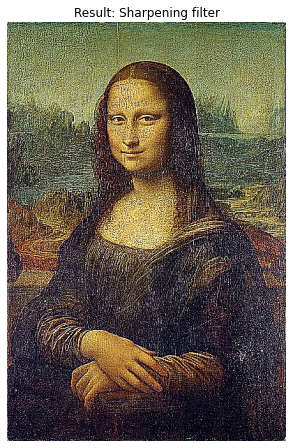

In [29]:
temp_image = image.copy()
show_image(temp_image, 'original image')

# 运行卷集核进行平滑操作或模糊操作
kernel = np.ones((3,3), np.float32)/9
result = cv2.filter2D(temp_image, -1, kernel)

# 进行两次模糊操作，效果更佳
result = cv2.filter2D(result, -1, kernel)
result = cv2.filter2D(result, -1, kernel)
show_image(result, 'result: blurring filter')

# 应用锐化滤波器
kernel_sharpening = np.array([[-1,-1,-1],
                               [-1,9,-1],
                               [-1,-1,-1]])
result = cv2.filter2D(temp_image, -1, kernel_sharpening)
show_image(result, 'Result: Sharpening filter')

**3-7 运行Canny边缘检测算法来检测边缘**

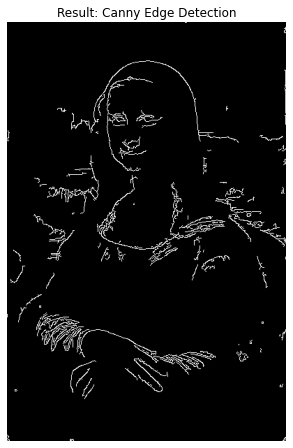

In [32]:
temp_image = image.copy()

# 将图像转换成灰度图像
gray = cv2.cvtColor(temp_image, cv2.COLOR_RGB2GRAY)

# 使用Canny算法检测边缘
edges = cv2.Canny(gray, 100, 255)

plt.figure(figsize=(5,10))
plt.axis('off')
plt.title('Result: Canny Edge Detection')
plt.imshow(edges, cmap='gray')

**3-8 使用Haar级联检测图像中的人脸（Haar Cascades)**

In [38]:
temp_image = image.copy()

# 将图像转换成灰度图像
gray = cv2.cvtColor(temp_image, cv2.COLOR_RGB2GRAY)

# 倒入级联分类器
# 改为openCV的全局路径，终端查询：pip show opencv-python
face_cascade = cv2.CascadeClassifier('haarcascade_profileface.xml')


# 检测人脸，并为其绘制绿色矩形
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
  roi_color = temp_image[y:y+h, x:x+w]
  # 显示检测到的roi区域
  show_image(roi_color, 'Result: ROI of face detected by Haar Cascade Classifier')
  cv2.rectangle(temp_image, (x,y), (x+w, y+h), (0,255,0), 2)

# 显示检测的结果
show_image(temp_image, "Result: Face detection using Haar Cascade Classifier")

error: ignored

# 3.3 处理视频

**3-9 从视频中提取帧进行处理**

In [3]:
import cv2 as cv

# 打开视频捕捉
cap = cv2.VideoCapture('sample_video.mp4')

# 帧计数器
counter = 0

# 当视频可读时
while(cap.isOpened()):
  # 读取一帧
  ret, frame = cap.read()
  # 帧计数器加1
  counter += 1
  print(counter)

  # 每帧图像灰度化处理
  new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

  # 每30帧显示一次
  if counter%30 == 0:
    plt.imshow(new_frame)
    plt.show()

# 发布视频文件
cap.release()

NameError: ignored

# 3.4 处理文本数据

## 3.4.1 自然语言处理

**3-10 清洗文本数据和提取基本信息的自然语言处理方法**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
stems:  ['studi', 'machin', 'learn', 'model', 'learn', 'pattern', 'data', 'learn', 'help', 'predict', 'new', 'data']
lemmas:  ['studying', 'machine', 'learning', 'model', 'learns', 'pattern', 'data', 'learning', 'help', 'predict', 'new', 'data']


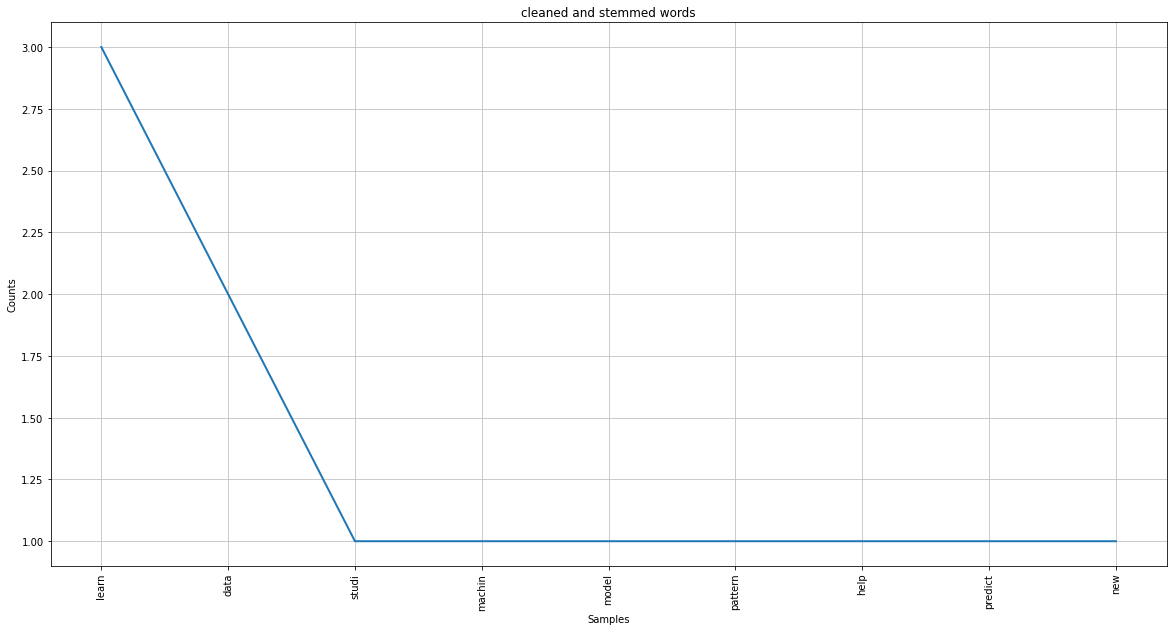

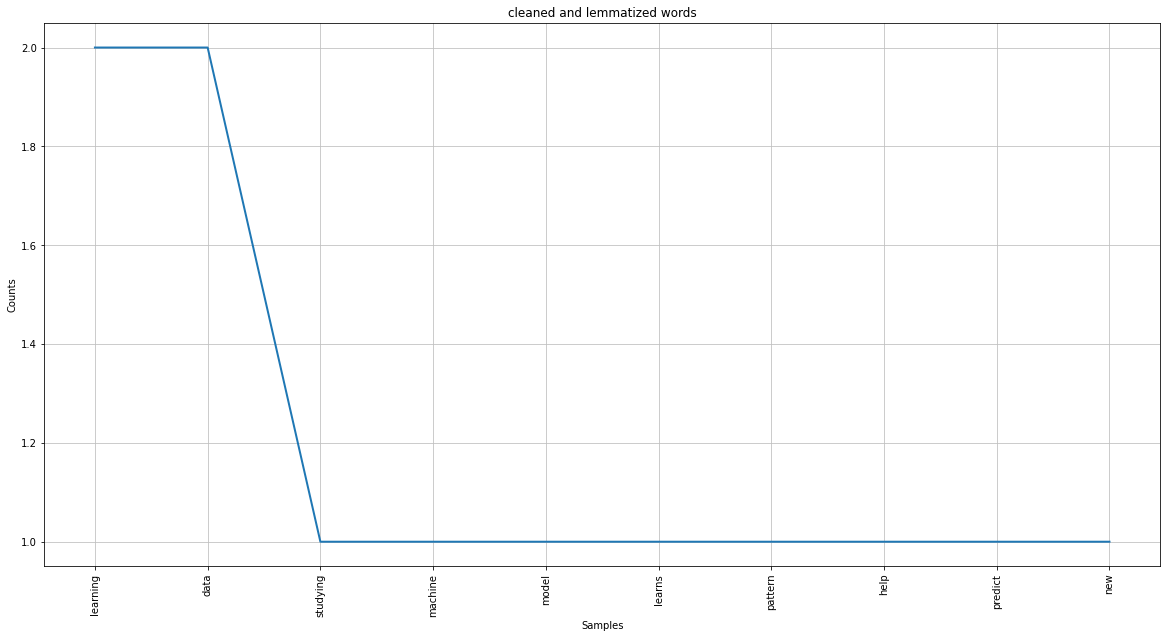

In [29]:
import nltk
nltk.download('punkt') # 第一次使用NLTK要下载
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

text = "We are studying Machine Learning. Our Model learns patterns in data. \
This learning helps it to predict on new data."

# 转为小写
text = text.lower()

# tokenization
tokens = nltk.word_tokenize(text)

# extract sentences
sentences = nltk.sent_tokenize(text)

# 删除停用词
stp_words = ['is', 'a', 'our' , 'on', '.', '!', 'we', 'are', 'this', 'of', 'and', 'from', 'to','it',
             'in']
clean_tokens = []
for token in tokens:
  if token not in stp_words:
    clean_tokens.append(token)

# lemmatization
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

clean_stem_tokens = []
clean_lemma_tokens = []

for token in clean_tokens:
  clean_stem_tokens.append(stemmer.stem(token))
  clean_lemma_tokens.append(lemmatizer.lemmatize(token))

print("stems: ", clean_stem_tokens)
print("lemmas: ", clean_lemma_tokens)

# 单词的分布频率
freq_lemma = nltk.FreqDist(clean_lemma_tokens)
freq_stem = nltk.FreqDist(clean_stem_tokens)

# 绘制频率图
plt.figure(figsize=(20, 10))
plt.title("cleaned and stemmed words")
freq_stem.plot(20, cumulative=False)
plt.show()

plt.figure(figsize=(20, 10))
plt.title("cleaned and lemmatized words")
freq_lemma.plot(20, cumulative=False)
plt.show()


**3-10 文本的词性标注和命名实体识别**

In [31]:
mysentence = "Mark is working at GE."

# 映射词性
token = nltk.word_tokenize(mysentence)
pos_tags = nltk.pos_tag(token)
pos_tags

entities = nltk.chunk.ne_chunk(pos_tags)
entities

TclError: ignored

Tree('S', [Tree('PERSON', [('Mark', 'NNP')]), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), Tree('ORGANIZATION', [('GE', 'NNP')]), ('.', '.')])

## 3.4.2 词嵌入

**3-13 独热编码单词的简单示例**

In [34]:
text1 = 'AI is the new electricity. AI is poised to start a large transformation on many industries.'

tokens = nltk.word_tokenize(text1)
words = [w.lower() for w in tokens]

# 创建相关单词的词汇表
vocab = sorted(set(words))

# 对词汇表中的每个词进行独热编码
for w in vocab:
  test_1hot = [0]*len(vocab)
  test_1hot[vocab.index(w)] = 1
  print("one hot vector for '%s' = " %w, test_1hot)

one hot vector for '.' =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'a' =  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'ai' =  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'electricity' =  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'industries' =  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'is' =  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'large' =  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'many' =  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
one hot vector for 'new' =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
one hot vector for 'on' =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
one hot vector for 'poised' =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
one hot vector for 'start' =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
one hot vector for 'the' =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
one hot vector for 'to

**3-14 词嵌入 Word2Vec**

In [39]:
from gensim.models import Word2Vec

text1 = text1.lower()

sent_tokens = nltk.sent_tokenize(text1)

stp_words = ['is', 'a', 'our' , 'on', '.', '!', 'we', 'are', 'this', 'of', 'and', 'from', 'to','it',
             'in']

sents = []
for s in sent_tokens:
  word_tokens = nltk.word_tokenize(s)

  clean_tokens = []

  for token in word_tokens:
    if token not in stp_words:
      clean_tokens.append(token)

sents.append(clean_tokens)
print('training data: ', sents)

# 训练word2vec模型，使用嵌入大小20
word2vec_model = Word2Vec(sents, size=20, min_count=1)

# 从预料库中学到的一些词汇
words = list(word2vec_model.wv.vocab)
print(words)

# 显示一些单词的词向量
print("enbedding vector for word 'ai' = ", word2vec_model['ai'])

training data:  [['ai', 'poised', 'start', 'large', 'transformation', 'many', 'industries']]
['ai', 'poised', 'start', 'large', 'transformation', 'many', 'industries']
enbedding vector for word 'ai' =  [-0.0025976  -0.00319945 -0.01618036 -0.01839524  0.01230379 -0.01614624
 -0.00859059 -0.01856986 -0.00892352  0.02134702 -0.0230419   0.01285155
 -0.0038255   0.01392493 -0.01000147  0.02082155 -0.00392385 -0.01162297
 -0.00222015  0.00478298]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


**3-15 减少词嵌入的维度并绘制单词**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


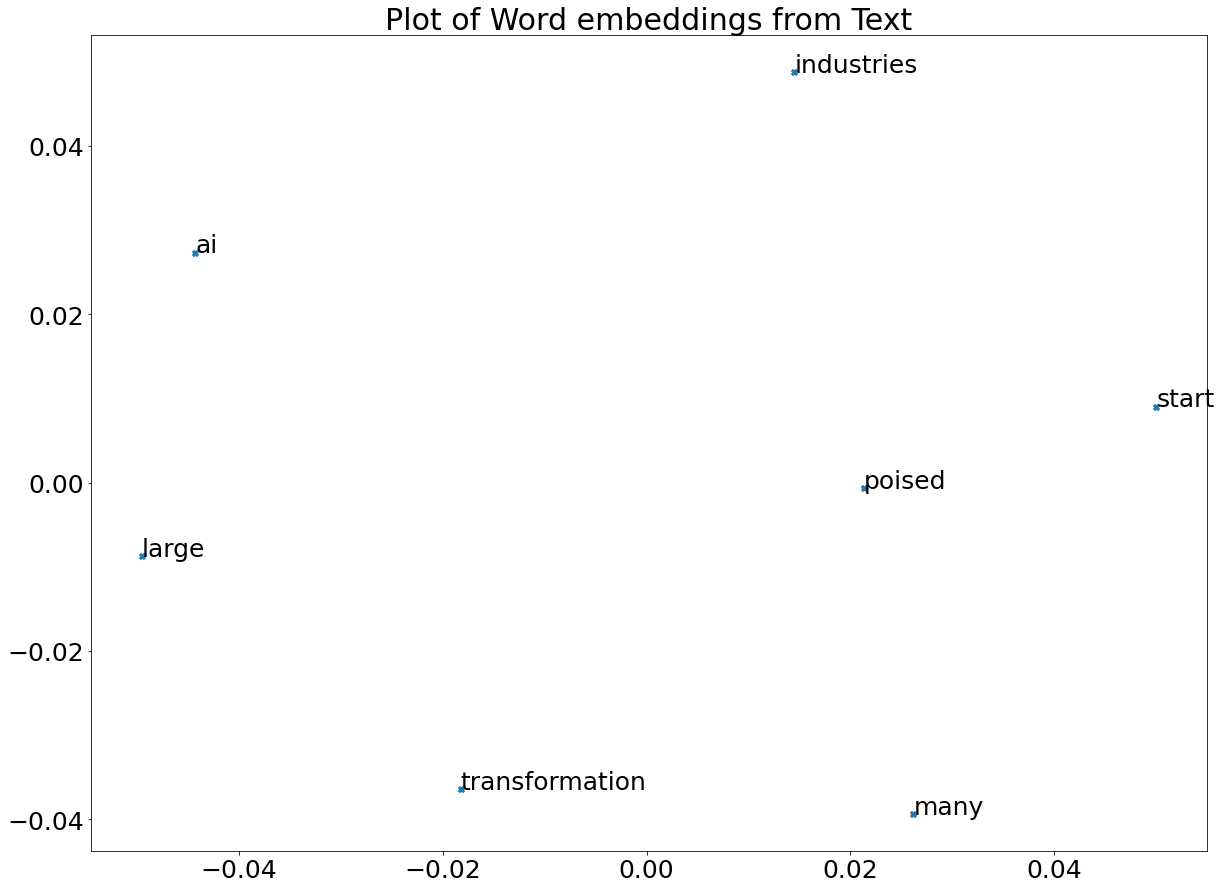

In [45]:
from sklearn.decomposition import PCA
# 使用word2vec建立训练数据
training_data = word2vec_model[word2vec_model.wv.vocab]
# 使用PCA进行降维
pca = PCA(n_components=2)
result = pca.fit_transform(training_data)

# 绘制二维向量的散点图
plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 25})
plt.title("Plot of Word embeddings from Text")
plt.scatter(result[:, 0], result[:, 1], marker="X")

# 在图中标记单词
words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy={result[i, 0],result[i, 1]})
plt.show()

# 3.5 听声音

**3-16 使用FFT分析汽车声音样本**

In [46]:
from spicy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

# 以大约2000转每分(r/min)运行的发动机记录的大约15秒的剪辑
AUDIO_FILE = 'sound_sample_car_engine.wav'

# 加载文件以获取频率和数据数组
sampling_freq, sound_data = wavfile.read(AUDIO_FILE)

# 显示读取数据的形状
print("sampling frequency = ", sampling_freq, "\nshape of data array = ", sound_data.shape)

# 将 -1～1 的声音值归一化
sound_data = sound_data / (2.**15)

# 仅先使用一个音频通道
if len(sound_data.shape) == 1:
  s1 = sound_data
else:
  s1 = sound_data[:, 0]

# 获取声音压波的时域表示
timeArray = np.arange(0, s1.shape[0], 1.0)
timeArray = timeArray / sampling_freq
timeArray = timeArray * 1000  # 缩放到毫秒

# 显示时域中的声音信号图
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 25})
plt.title('Plot of sound pressure values over time')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.plot(timeArray, sound_data, color='b')
plt.show()

# FFT点数
n = len(s1)
p = np.fft.fft(s1) # 进行FFT

# 只有一半的点会给我们频点
nUniquePts = int(np.ceil((n+1)/2.0))
p = p[0:nUniquePts]
p = abs(p)

# 创建频率点数组
freqArray = np.arange(0, float(nUniquePts), 1.0) * float(sampling_freq)
/ n;

# 将频率（赫兹）转速为转速（转每分）
MAX_RPM = 20000
NUM_POINTS = 20

# 移除大于MAX_RPM的点数
maxhz = MAX_RPM/60
p[freqArray > maxhz] = 0

# 绘制频域图
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 25})
plt.title('Plot of sound waves in frequency domain')
plt.plot(freqArray*60, p, color='r')
plt.xlabel('Engine RPM')
plt.ylabel('Signal Power (dB)')
plt.xlim([0,MAX_RPM])
plt.xticks(np.arange(0, MAX_RPM, MAX_RPM/NUM_POINTS),
size='small',rotation=40)
plt.grid()
plt.show()

ModuleNotFoundError: ignored